In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [101]:
df = pd.read_csv("datasets/feinstaub_tram.csv", delimiter=";")

In [102]:
df.head()

,Datum und Zeit,Sensoren-ID,PM2.5,PM10,Geopunkte,Längengrad,Breitengrad
0,2019-12-20T07:55:00+01:00,228,12.49,16.01,"47.548531,7.630053",7.630053,47.548531
1,2019-12-20T07:57:00+01:00,228,11.41,18.22,"47.548683,7.630227",7.630227,47.548683
2,2019-12-20T07:58:00+01:00,228,11.68,16.24,"47.548605,7.629927",7.629927,47.548605
3,2019-12-20T08:05:00+01:00,228,13.83,17.78,"47.553885,7.609081",7.609081,47.553885
4,2019-12-20T08:08:00+01:00,228,15.34,22.98,"47.552186,7.598849",7.598849,47.552186


In [103]:
len(df)

933434

In [104]:
df["Datum und Zeit"].max()

'2020-03-24T10:07:00+01:00'

In [105]:
df["Datum und Zeit"].min()

'2019-12-01T00:00:00+01:00'

In [106]:
# three months only...

In [107]:
df = df.dropna()

In [108]:
uni = df.Geopunkte.astype("str")

In [109]:
uni = uni.unique()

In [110]:
longs = []
lats = []

for item in uni:
    s = item.split(",")
    lats.append(float(s[0]))
    longs.append(float(s[1]))

In [111]:
min(longs)

7.536518

In [112]:
max(longs)

7.730737

In [113]:
min(lats)

47.485639

In [114]:
max(lats)

47.595141

In [115]:
len(lats)

685329

In [116]:
box = (min(longs), max(longs), min(lats), max(lats))

In [117]:
basel = plt.imread("maps/basel_tram.png")

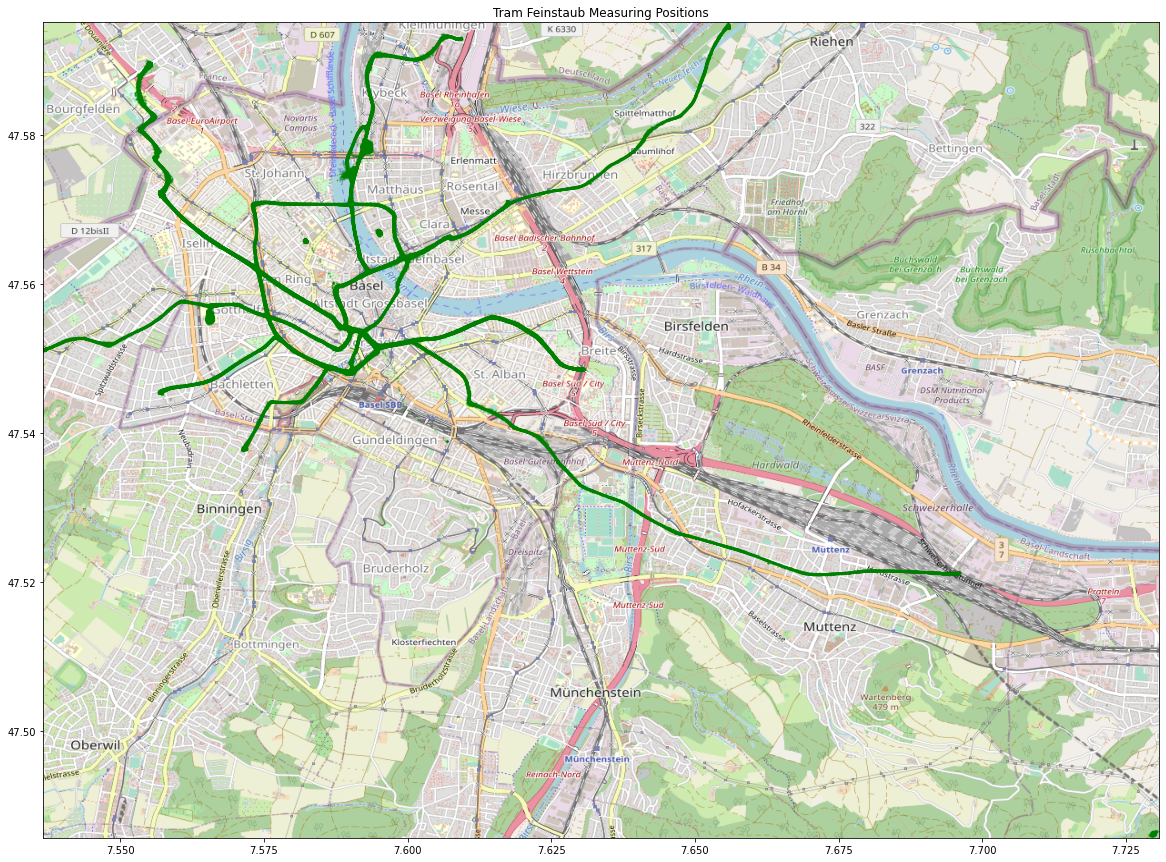

In [118]:
plt.figure(figsize=(20, 15))
plt.scatter(longs, lats, marker="o", zorder=1, c="green", alpha=.2, s=1)
plt.title("Tram Feinstaub Measuring Positions")
plt.xlim(min(longs), max(longs))
plt.ylim(min(lats), max(lats))

plt.imshow(basel, zorder=0, extent=box, aspect="auto")
plt.show()

In [85]:
df.head()

,Datum und Zeit,Sensoren-ID,PM2.5,PM10,Geopunkte,Längengrad,Breitengrad
0,2019-12-20T07:55:00+01:00,228,12.49,16.01,"47.548531,7.630053",7.630053,47.548531
1,2019-12-20T07:57:00+01:00,228,11.41,18.22,"47.548683,7.630227",7.630227,47.548683
2,2019-12-20T07:58:00+01:00,228,11.68,16.24,"47.548605,7.629927",7.629927,47.548605
3,2019-12-20T08:05:00+01:00,228,13.83,17.78,"47.553885,7.609081",7.609081,47.553885
4,2019-12-20T08:08:00+01:00,228,15.34,22.98,"47.552186,7.598849",7.598849,47.552186


In [119]:
# test 2020/01/10
df["Datum und Zeit"] = pd.to_datetime(df["Datum und Zeit"])

In [122]:
df.head()

,Datum und Zeit,Sensoren-ID,PM2.5,PM10,Geopunkte,Längengrad,Breitengrad
0,2019-12-20 07:55:00+01:00,228,12.49,16.01,"47.548531,7.630053",7.630053,47.548531
1,2019-12-20 07:57:00+01:00,228,11.41,18.22,"47.548683,7.630227",7.630227,47.548683
2,2019-12-20 07:58:00+01:00,228,11.68,16.24,"47.548605,7.629927",7.629927,47.548605
3,2019-12-20 08:05:00+01:00,228,13.83,17.78,"47.553885,7.609081",7.609081,47.553885
4,2019-12-20 08:08:00+01:00,228,15.34,22.98,"47.552186,7.598849",7.598849,47.552186


In [133]:
df["year"] = df["Datum und Zeit"].apply(lambda x: x.year)
df["month"] = df["Datum und Zeit"].apply(lambda x: x.month)
df["day"] = df["Datum und Zeit"].apply(lambda x: x.day)

In [141]:
df["hour"] = df["Datum und Zeit"].apply(lambda x: x.hour)
df["minute"] = df["Datum und Zeit"].apply(lambda x: x.minute)

In [144]:
# select 2020/01/10 at between 09:00 and 10:00
day = df[(df.year == 2020) & (df.month == 1) & (df.day == 10) & (df.hour > 8) & (df.hour < 11)]

In [145]:
len(day)

840

In [146]:
longs = day.Längengrad
lats = day.Breitengrad
pm = day["PM2.5"]

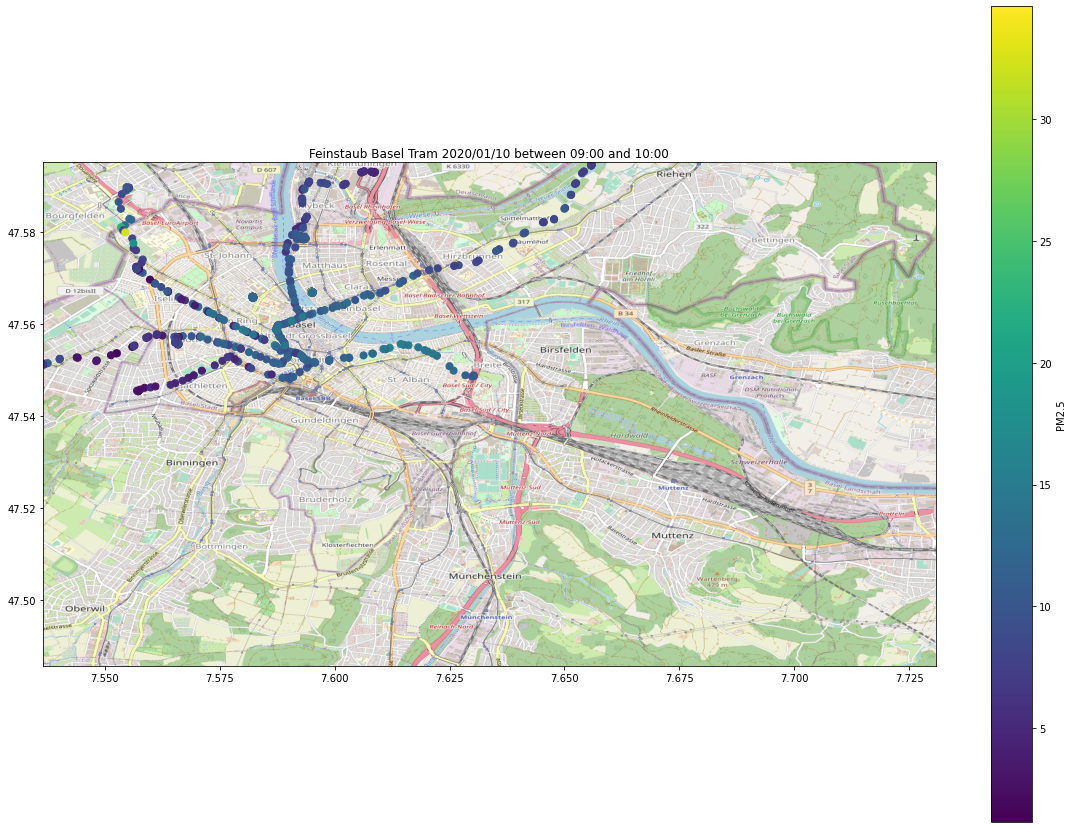

In [154]:
plt.figure(figsize=(20, 15))
plt.scatter(longs, lats, marker="o", zorder=1, c=pm, s=50)
plt.colorbar(label="PM2.5")
plt.title("Feinstaub Basel Tram 2020/01/10 between 09:00 and 10:00")
plt.xlim(box[0], box[1])
plt.ylim(box[2], box[3])

plt.imshow(basel, zorder=0, extent = box)
plt.show()